# **Gamers Club | CASE - Data Analyst**

## **Lucas R. Schiavetti | Feb, 22**

### *Context*

* the main goal of this case is explore CS:GO data within Gamers Club business context; 
* the available database (data.db) has four tables (players, lobby-players, medals and medal-players) 
  * keys are **player_id** and **medal_id**;
  
<img src="./figs/mer.png" alt="drawing" style="width:500px;"/>

* some data quality validation was made in **query_validation.sql**
* the questions related to the case were answered with the sql code in **query_answers.sql**
* this notebook has complimentary analysis to the case, mainly with summary **statistics and some plots**;



### **Notebook Setup**

In [1]:
# importing libraries

import os
import datetime as dt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy import exc

In [2]:
# setting up sns plots
sns.set_style("whitegrid", {'axes.grid':False})

In [3]:
# setting up directories

SOURCE_DIR = os.path.abspath('.')
DATA_DIR = os.path.join(SOURCE_DIR, 'data')
FIGS_DIR = os.path.join(SOURCE_DIR, 'figs')
QUERY_DIR = os.path.join(SOURCE_DIR, 'queries')
PLOT_DIR = os.path.join(SOURCE_DIR, 'plots')

### **Auxiliary Functions**

In [4]:
# df metadata

def meta_df(df):

    return pd.DataFrame({'dtypes': df.dtypes,
                         'nmissing': df.isna().sum(),
                         'missing%': round(df.isna().sum()/df.shape[0]*100, 2),
                         'nunique': df.nunique(),
                         'nunique%': round(df.nunique()/df.shape[0]*100, 2),
                         'size': df.shape[0]}, index = df.columns)

In [5]:
# connect to database and import query from query dir

def connect_db():
    print('Connection to DB..')
    try:
        con = sqlalchemy.create_engine('sqlite:///' + os.path.join(DATA_DIR, 'data.db'))
        print('Connection OK.')
    except exc.SQLAlchemyError as e:
        print('Error', e)
        print('DB connection error!')
    return con

def import_query (path, **kwards):
    with open( path, 'r', **kwards) as file_open:
        result = file_open.read()
    return result

### **Workflow | Players**

##### **Stats**

In [6]:
# connection to DB
con = connect_db()

Connection to DB..
Connection OK.


In [7]:
# loading players data

query_players = import_query(os.path.join(QUERY_DIR, 'query_players.sql'))
df_players = pd.read_sql(query_players, con, parse_dates=["date_register", "date_birthday"])
df_players.head(10)

,player_id,has_facebook,has_twitch,has_twitter,has_social,has_social_engaged,date_register,date_register_ym,base_time_days,base_time_months,date_birthday,age,country,flag_br
0,1,0,0,0,0,0,2014-01-27,2014-01,2932,97,1995-03-06,26.0,br,1
1,2,0,0,0,0,0,2014-01-02,2014-01,2957,98,1997-05-26,24.0,br,1
2,3,0,0,0,0,0,2014-07-07,2014-07,2771,92,1997-09-17,24.0,br,1
3,4,0,0,0,0,0,2014-07-11,2014-07,2767,92,2001-01-26,21.0,br,1
4,5,0,0,0,0,0,2014-11-25,2014-11,2630,87,1997-10-16,24.0,br,1
5,6,0,0,0,0,0,2014-06-13,2014-06,2795,93,1998-12-29,23.0,br,1
6,7,0,0,0,0,0,2014-06-10,2014-06,2798,93,1992-09-03,29.0,br,1
7,8,0,0,0,0,0,2014-07-20,2014-07,2758,91,1990-01-21,32.0,br,1
8,9,0,0,0,0,0,2014-09-19,2014-09,2697,89,1988-03-28,33.0,br,1
9,10,0,0,0,0,0,2014-11-28,2014-11,2627,87,1990-02-28,31.0,br,1


In [8]:
meta_df(df_players)

,dtypes,nmissing,missing%,nunique,nunique%,size
player_id,int64,0,0.00,2500,100.00,2500
has_facebook,int64,0,0.00,2,0.08,2500
has_twitch,int64,0,0.00,2,0.08,2500
has_twitter,int64,0,0.00,2,0.08,2500
has_social,int64,0,0.00,2,0.08,2500
has_social_engaged,int64,0,0.00,2,0.08,2500
date_register,datetime64[ns],0,0.00,1550,62.00,2500
date_register_ym,object,0,0.00,96,3.84,2500
base_time_days,int64,0,0.00,1547,61.88,2500
base_time_months,int64,0,0.00,96,3.84,2500


In [9]:
# age
df_players.age.describe()

count    1781.000000
mean       23.610331
std         6.734014
min         2.000000
25%        20.000000
50%        22.000000
75%        27.000000
max       136.000000
Name: age, dtype: float64

* 2 and 136 are not valid ages...
* Q3 - Q1 looks good (27-21)

In [10]:
print('10 youngest:', sorted(df_players.age.unique())[:10])
print('10 oldest:', sorted(df_players.age.unique(), reverse=True)[:10])

10 youngest: [2.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0]
10 oldest: [nan, 136.0, 125.0, 87.0, 76.0, 71.0, 56.0, 54.0, 52.0, 47.0]


* age is what we expect but some values are clearly wrong (2 and 136); we will exclude 2 and values above 56

In [11]:
df_players = df_players[(df_players.age >= 13) & (df_players.age <= 56)]
df_players.age.describe()

count    1775.000000
mean       23.410141
std         5.215720
min        13.000000
25%        20.000000
50%        22.000000
75%        27.000000
max        56.000000
Name: age, dtype: float64

In [12]:
df_players.age.quantile([0.2, 0.90])

0.2    19.0
0.9    30.0
Name: age, dtype: float64

* 80% of the base between 19 and 30 y.o.

In [13]:
# register
df_players.date_register.dt.to_period('Y').value_counts(normalize=True).sort_index()

2014    0.009014
2015    0.033239
2016    0.137465
2017    0.163380
2018    0.145915
2019    0.152676
2020    0.220845
2021    0.120563
2022    0.016901
Freq: A-DEC, Name: date_register, dtype: float64

* marked increase from 2015-2016 
* 2020 has the biggest share
  * covid?

In [14]:
# country
df_players.country.value_counts(normalize=True)

br    0.758873
ar    0.176338
cl    0.041127
uy    0.008451
pe    0.007324
us    0.003380
py    0.002254
pt    0.000563
bo    0.000563
ca    0.000563
ec    0.000563
Name: country, dtype: float64

* Brazil, Argentina, Chile, Uruguay and Peru

In [15]:
# social media presence

sm_df = pd.DataFrame()
for sm_feature in ['has_facebook','has_twitter','has_twitch','has_social', 'has_social_engaged']:
    sm_df[sm_feature] = df_players[sm_feature].value_counts(normalize=True)
sm_df = sm_df.T
sm_df.columns=['false', 'true']
sm_df

,false,true
has_facebook,0.967324,0.032676
has_twitter,0.980845,0.019155
has_twitch,0.975211,0.024789
has_social,0.954930,0.045070
has_social_engaged,0.986479,0.013521


* **very small** % of social media presence..
* bad data? not mandatory during register?

#### **Plots**

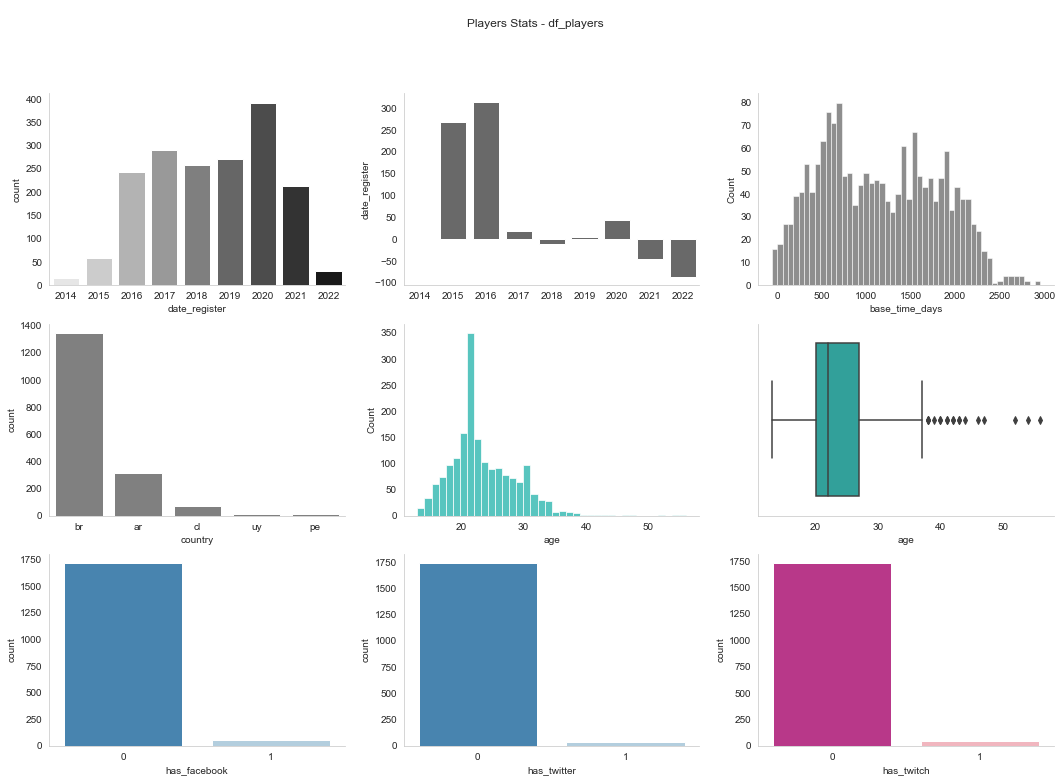

In [16]:
def plot_stats(df, title):
    fig, axs = plt.subplots(3, 3, figsize = (18,12))
    fig.suptitle('\nPlayers Stats - {}'.format(title))
    
    # register
    sns.countplot(ax=axs[0][0], x = df.date_register.dt.to_period('Y'), palette='gray_r')
    anos = df.date_register.dt.to_period('Y').unique()
    anos_dif = df.date_register.dt.to_period('Y').value_counts().sort_index().pct_change().apply(lambda x:x*100)
    sns.barplot(ax=axs[0][1], x=anos, y=anos_dif, color='dimgray')
    sns.histplot(ax=axs[0][2], x= df.base_time_days, color='dimgray', bins=50) 
    
    # country and age
    sns.countplot(ax=axs[1][0], x = df.country, order=df.country.value_counts().index[:5], color='grey')  
    sns.histplot(ax=axs[1][1], x = df.age, color='lightseagreen')
    sns.boxplot(ax=axs[1][2], x = df.age, color='lightseagreen')
    
    # social media
    sns.countplot(ax=axs[2][0], x = df.has_facebook, palette='Blues_r')
    sns.countplot(ax=axs[2][1], x = df.has_twitter, palette='Blues_r')
    sns.countplot(ax=axs[2][2], x = df.has_twitch, palette='RdPu_r')
    
    sns.despine()
    plt.savefig(os.path.join(PLOT_DIR, 'plot_players_{}'.format(title)), bbox_inches='tight')
    
plot_stats(df_players, 'df_players')

### **Workflow - Lobbies**

#### **Stats**

In [17]:
# loading lobbie-player data

query_lobbies = import_query(os.path.join(QUERY_DIR, 'query_lobbies.sql'))
df_lobbies = pd.read_sql(query_lobbies, con)
df_lobbies.head(10)

,player_id,distinct_idlobby_game,n_victories,win_rate,date_first_lobby,date_last_lobby,days_since_last_game,days_playing,n_de_dust2,wins_de_dust2,...,sum_rounds_played,rounds_per_game,min_level,max_level,var_level,test,avg_shots,avg_hits,avg_damage,avg_clutch_won
0,660,810,389,0.480247,2021-08-09,2022-01-01,36,145,95,34,...,21898,27.034568,12,16,4,15.999995,573.658025,56.396296,2392.766667,0.575309
1,297,800,398,0.497500,2021-08-09,2021-12-26,42,138,220,118,...,21932,27.415000,18,20,2,19.999992,355.201250,59.409774,2735.206250,0.530000
2,1454,786,386,0.491094,2021-08-09,2022-01-06,31,149,92,40,...,21117,26.866412,15,19,4,18.999994,394.414758,59.435669,2407.741730,0.488550
3,664,782,358,0.457801,2021-08-09,2022-01-06,31,149,99,51,...,21192,27.099744,16,19,3,18.999993,362.108696,55.592830,2240.887468,0.470588
4,1866,701,329,0.469330,2021-08-09,2022-01-06,31,149,71,30,...,18878,26.930100,12,17,5,16.999995,516.382311,65.353362,2517.166904,0.306705
5,1352,698,331,0.474212,2021-08-09,2022-01-02,35,145,75,33,...,18668,26.744986,15,19,4,18.999994,456.994269,63.249284,2494.869628,0.409742
6,296,691,334,0.483357,2021-08-09,2022-01-06,31,149,151,77,...,18565,26.866860,14,19,5,18.999994,475.373372,63.882609,2213.638205,0.612156
7,886,672,335,0.498512,2021-08-09,2022-01-06,31,149,88,41,...,17757,26.424107,19,21,2,20.999992,444.590774,60.367560,2736.772321,0.331845
8,1028,630,336,0.533333,2021-08-09,2022-01-06,31,149,50,25,...,16840,26.730159,19,21,2,20.999992,350.063492,52.352381,2511.719048,0.419048
9,1151,601,293,0.487521,2021-08-10,2022-01-03,34,145,120,59,...,15885,26.430948,19,20,1,19.999992,512.760399,62.815308,2431.106489,0.542429


In [18]:
meta_df(df_lobbies)

,dtypes,nmissing,missing%,nunique,nunique%,size
player_id,int64,0,0.00,2185,100.00,2185
distinct_idlobby_game,int64,0,0.00,360,16.48,2185
n_victories,int64,0,0.00,215,9.84,2185
win_rate,float64,0,0.00,914,41.83,2185
date_first_lobby,object,0,0.00,151,6.91,2185
date_last_lobby,object,0,0.00,104,4.76,2185
days_since_last_game,int64,0,0.00,101,4.62,2185
days_playing,int64,0,0.00,150,6.86,2185
n_de_dust2,int64,0,0.00,93,4.26,2185
wins_de_dust2,int64,0,0.00,55,2.52,2185


In [19]:
# checkin missing values of map win% 
df_lobbies[df_lobbies.wr_de_dust2.isna() == True][['n_de_dust2', 'wins_de_dust2','wr_de_dust2']].head(10)

,n_de_dust2,wins_de_dust2,wr_de_dust2
200,0,0,NaN
228,0,0,NaN
292,0,0,NaN
419,0,0,NaN
469,0,0,NaN
506,0,0,NaN
714,0,0,NaN
724,0,0,NaN
744,0,0,NaN
818,0,0,NaN


* **nan values in win% happen when players dodn't play the current map**

In [20]:
# active players
df_lobbies.player_id.nunique()

2185

In [21]:
# number of lobbies played

df_lobbies.distinct_idlobby_game.describe()

count    2185.000000
mean       83.565675
std       106.647812
min         1.000000
25%        12.000000
50%        43.000000
75%       117.000000
max       810.000000
Name: distinct_idlobby_game, dtype: float64

* number of lobbies per player ranging from 1-810
* 75% of the base with 117 or less games
* mean - 106

In [22]:
# level variation
df_lobbies.var_level.value_counts(normalize=True).sort_index()

0     0.171167
1     0.275057
2     0.210526
3     0.134554
4     0.063158
5     0.034783
6     0.025172
7     0.011442
8     0.014188
9     0.014188
10    0.013272
11    0.006865
12    0.010069
13    0.005950
14    0.001831
15    0.002746
16    0.003661
19    0.000458
20    0.000458
21    0.000458
Name: var_level, dtype: float64

* 78% of the base have levels from 0-3

In [23]:
df_lobbies.days_since_last_game.describe()

count    2185.000000
mean       43.849428
std        18.834413
min        31.000000
25%        33.000000
50%        38.000000
75%        49.000000
max       178.000000
Name: days_since_last_game, dtype: float64

* mean - 43 days since last game | 75% of the base with less than 49 games

In [24]:
# further analysis of days since last game...a first estimate of churn?

iqr = df_lobbies.days_since_last_game.quantile(0.75) - df_lobbies.days_since_last_game.quantile(0.25)
df_lobbies.days_since_last_game.quantile(0.75) + iqr * 1.5

73.0

#### **Plots**

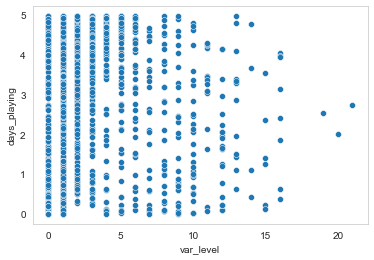

In [25]:
# level variation per months playing

sns.scatterplot(x=df_lobbies.var_level, y=df_lobbies.days_playing.apply(lambda x:x/30), y_bins=5)
plt.show()

* there is no clear relation between days_playing and level variation

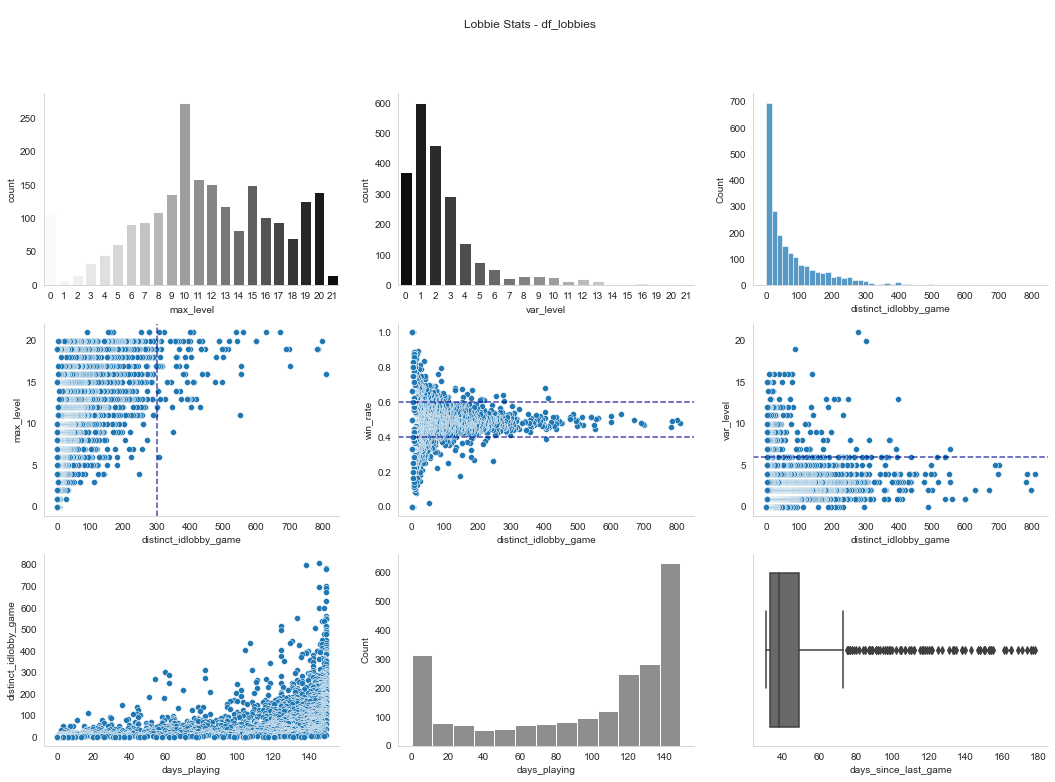

In [26]:
def plot_player_lobbie_stats(df, title):
    fig, axs = plt.subplots(3, 3, figsize = (18,12))
    fig.suptitle('\nLobbie Stats - {}'.format(title))
    
    # level
    sns.countplot(ax=axs[0][0], x=df.max_level, palette='Greys')
    sns.countplot(ax=axs[0][1], x=df.var_level, palette='Greys_r')
    sns.histplot(ax=axs[0][2], x=df.distinct_idlobby_game)
    
    # games played
    sns.scatterplot(ax = axs[1][0], y=df.max_level, x=df.distinct_idlobby_game)
    axs[1][0].axvline(x=300, color='darkblue', linewidth=1.5, alpha=.7, ls='--')
    sns.scatterplot(ax=axs[1][1], y=df.win_rate, x=df.distinct_idlobby_game)
    axs[1][1].axhline(y=.4, color='darkblue', linewidth=1.5, alpha=.7, ls='--')
    axs[1][1].axhline(y=.6, color='darkblue', linewidth=1.5, alpha=.7, ls='--')
    sns.scatterplot(ax=axs[1][2], x=df.distinct_idlobby_game, y=df.var_level)
    axs[1][2].axhline(y=6, color='darkblue', linewidth=1.5, alpha=.7, ls='--')
    
    # LT
    sns.scatterplot(ax=axs[2][0], x=df.days_playing, y=df_lobbies.distinct_idlobby_game)
    sns.histplot(ax=axs[2][1], x=df.days_playing, color='dimgray')
    sns.boxplot(ax=axs[2][2], x=df.days_since_last_game, color='dimgray')

    sns.despine()
    plt.savefig(os.path.join(PLOT_DIR, 'plot_lobbies_{}'.format(title)), bbox_inches='tight')
    
plot_player_lobbie_stats(df_lobbies, 'df_lobbies')

### **Workflow - Medals**

#### **Stats**

In [27]:
# loading medal data

query_medals = import_query(os.path.join(QUERY_DIR, 'query_medals.sql'))
query_medals_players = import_query(os.path.join(QUERY_DIR, 'query_medals_players.sql'))
df_medals = pd.read_sql(query_medals, con)
df_medals_players = pd.read_sql(query_medals_players, con)

In [28]:
df_medals.shape

(37611, 11)

In [29]:
df_medals.head()

,id_registro,player_id,medalha_id,data_atribuicao_medalha,data_expiracao_medalha,data_removida_medalha,data_updated,ativo,descricao_medalha,tipo_medalha,classe
0,1,1,11,2016-09-28 00:00:00.000000,2016-10-27 00:00:00.000000,2016-10-28 00:00:00.000000,None,0,Membro Premium,MEDAL,member
1,2,1,11,2016-12-07 00:00:00.000000,2017-01-06 00:00:00.000000,2017-01-07 00:00:00.000000,None,0,Membro Premium,MEDAL,member
2,3,1,11,2016-09-07 00:00:00.000000,2016-10-07 00:00:00.000000,2016-10-08 00:00:00.000000,None,0,Membro Premium,MEDAL,member
3,4,1,11,2016-10-18 00:00:00.000000,2016-11-17 00:00:00.000000,2016-11-18 00:00:00.000000,None,0,Membro Premium,MEDAL,member
4,5,1,16,2020-05-17 00:00:00.000000,None,None,2020-08-17 00:00:00.000000,0,Elite,MEDAL,elite


In [30]:
meta_df(df_medals)

,dtypes,nmissing,missing%,nunique,nunique%,size
id_registro,int64,0,0.00,37611,100.00,37611
player_id,int64,0,0.00,2492,6.63,37611
medalha_id,int64,0,0.00,349,0.93,37611
data_atribuicao_medalha,object,277,0.74,1995,5.30,37611
data_expiracao_medalha,object,23690,62.99,1925,5.12,37611
data_removida_medalha,object,23094,61.40,1835,4.88,37611
data_updated,object,18225,48.46,1244,3.31,37611
ativo,int64,0,0.00,2,0.01,37611
descricao_medalha,object,0,0.00,349,0.93,37611
tipo_medalha,object,0,0.00,2,0.01,37611


* 277 medals without registration date
* expiration and removal data is almost 60% missing
  * these medals were not removed or data is bad?
* ~48% of the medals were not updated 

In [31]:
# df with count of medals of each classe, per player

df_medals_players.head()

,player_id,distinct_medals,n_team_medal,n_partner_medal,n_member_medal,n_participant_medal,n_lembranca_medal,n_pedra_medal,n_bom_comportamento_medal,n_inicio_10_25_medal,n_prime_medal,n_rookie_medal,n_aspirante_medal,n_elite_medal,n_other_medal,active_medals
0,1,23,0,0,10,0,0,0,1,2,1,1,1,1,14,15
1,2,8,0,0,4,1,0,0,1,2,1,0,0,1,0,4
2,3,11,0,0,12,1,0,0,1,2,1,0,0,2,3,7
3,4,7,0,0,4,0,0,0,1,2,1,1,1,0,0,6
4,5,7,0,0,6,0,0,0,1,2,1,0,0,0,2,5


In [32]:
meta_df(df_medals_players)

,dtypes,nmissing,missing%,nunique,nunique%,size
player_id,int64,0,0.0,2492,100.00,2492
distinct_medals,int64,0,0.0,93,3.73,2492
n_team_medal,int64,0,0.0,45,1.81,2492
n_partner_medal,int64,0,0.0,10,0.40,2492
n_member_medal,int64,0,0.0,59,2.37,2492
n_participant_medal,int64,0,0.0,10,0.40,2492
n_lembranca_medal,int64,0,0.0,22,0.88,2492
n_pedra_medal,int64,0,0.0,9,0.36,2492
n_bom_comportamento_medal,int64,0,0.0,3,0.12,2492
n_inicio_10_25_medal,int64,0,0.0,5,0.20,2492


#### **Plots**

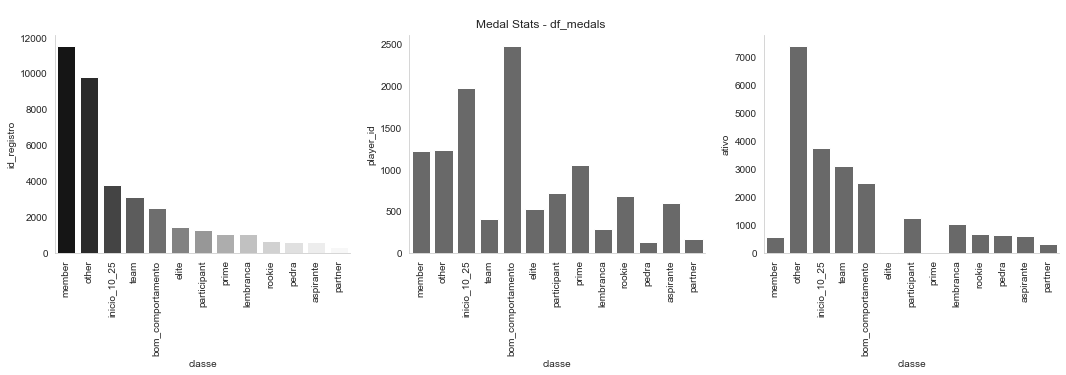

In [33]:
def plot_player_medals_stats(df, title):
    fig, axs = plt.subplots(1, 3, figsize = (18,4))
    fig.suptitle('\nMedal Stats - {}'.format(title))
    

    df_grouped = df.groupby('classe').agg({
        'id_registro': 'count',
        'player_id': pd.Series.nunique,
        'ativo': 'sum',
        
    }).reset_index().sort_values(by='id_registro', ascending=False)
    
    sns.barplot(ax=axs[0], x=df_grouped.classe, y=df_grouped.id_registro, palette='Greys_r').tick_params(axis='x', rotation=90)
    sns.barplot(ax=axs[1], x=df_grouped.classe, y=df_grouped.player_id, color='dimgray').tick_params(axis='x', rotation=90)
    sns.barplot(ax=axs[2], x=df_grouped.classe, y=df_grouped.ativo, color='dimgray').tick_params(axis='x', rotation=90)

    sns.despine()
    plt.savefig(os.path.join(PLOT_DIR, 'plot_medals_{}'.format(title)), bbox_inches='tight')
    
plot_player_medals_stats(df_medals, 'df_medals')

### **Workflow - Profiles**

A good exercise may be to filter our player and lobby stats by medal profile, as a test to see if they change significantly (at least visually, in our plots).

We can filter by selecting the ids that do have some of the **specific medals in the df_medals_players** dataframe and then **querying our main dfs (df_players and 
df_lobbies)**

#### **Partner**

In [34]:
# filtering players with partner medals

df_partners = df_players[df_players.player_id.isin(df_medals_players[df_medals_players.n_partner_medal > 0].player_id.values)]
df_lobbies_partners = df_lobbies[df_lobbies.player_id.isin(df_medals_players[df_medals_players.n_partner_medal > 0].player_id.values)]
df_partners

,player_id,has_facebook,has_twitch,has_twitter,has_social,has_social_engaged,date_register,date_register_ym,base_time_days,base_time_months,date_birthday,age,country,flag_br
5,6,0,0,0,0,0,2014-06-13,2014-06,2795,93,1998-12-29,23.0,br,1
8,9,0,0,0,0,0,2014-09-19,2014-09,2697,89,1988-03-28,33.0,br,1
9,10,0,0,0,0,0,2014-11-28,2014-11,2627,87,1990-02-28,31.0,br,1
12,13,0,0,0,0,0,2014-08-12,2014-08,2735,91,1987-12-05,34.0,br,1
72,73,1,1,0,1,0,2016-02-17,2016-02,2181,72,1996-07-20,25.0,br,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,2151,0,0,0,0,0,2021-06-17,2021-06,234,7,2004-02-05,18.0,br,1
2170,2171,0,0,0,0,0,2021-02-19,2021-02,353,11,2000-01-08,22.0,br,1
2199,2200,0,0,0,0,0,2021-04-14,2021-04,298,9,2004-03-21,17.0,br,1
2222,2223,0,0,0,0,0,2021-04-12,2021-04,300,10,1996-05-30,25.0,br,1


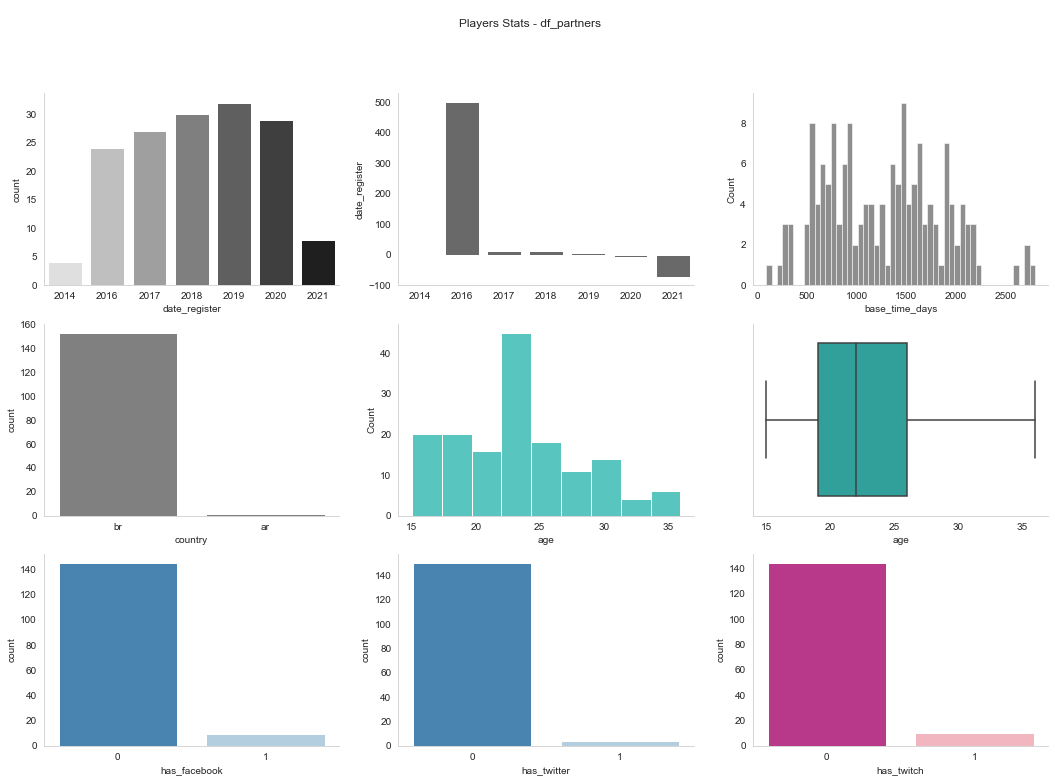

In [35]:
plot_stats(df_partners, 'df_partners')

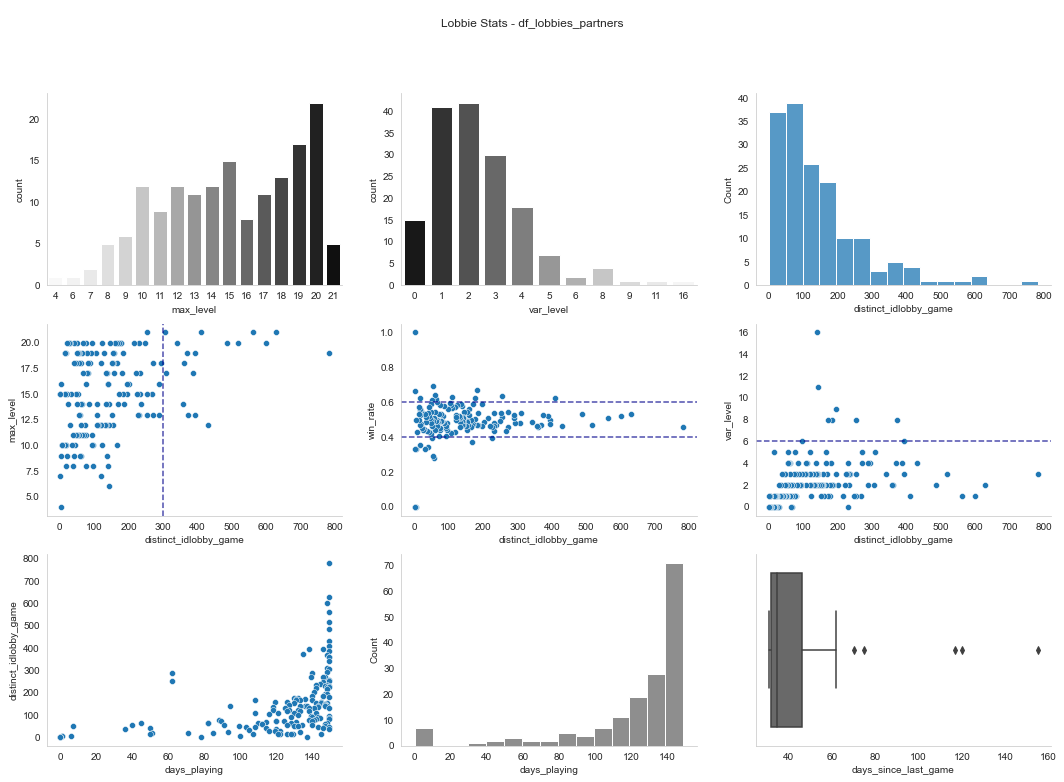

In [36]:
plot_player_lobbie_stats(df_lobbies_partners, 'df_lobbies_partners')

#### **Participant**

In [37]:
# filtering players with participant medals

df_participant = df_players[df_players.player_id.isin(df_medals_players[df_medals_players.n_participant_medal > 0].player_id.values)]
df_lobbies_participant = df_lobbies[df_lobbies.player_id.isin(df_medals_players[df_medals_players.n_participant_medal > 0].player_id.values)]
df_participant

,player_id,has_facebook,has_twitch,has_twitter,has_social,has_social_engaged,date_register,date_register_ym,base_time_days,base_time_months,date_birthday,age,country,flag_br
1,2,0,0,0,0,0,2014-01-02,2014-01,2957,98,1997-05-26,24.0,br,1
2,3,0,0,0,0,0,2014-07-07,2014-07,2771,92,1997-09-17,24.0,br,1
7,8,0,0,0,0,0,2014-07-20,2014-07,2758,91,1990-01-21,32.0,br,1
8,9,0,0,0,0,0,2014-09-19,2014-09,2697,89,1988-03-28,33.0,br,1
9,10,0,0,0,0,0,2014-11-28,2014-11,2627,87,1990-02-28,31.0,br,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,1761,0,0,0,0,0,2020-05-17,2020-05,630,21,1988-11-08,33.0,br,1
1789,1790,0,0,0,0,0,2020-08-06,2020-08,549,18,1987-12-04,34.0,br,1
1794,1795,0,0,0,0,0,2020-06-14,2020-06,602,20,1994-08-03,27.0,br,1
1827,1828,0,0,0,0,0,2020-11-14,2020-11,449,14,2002-10-20,19.0,ar,0


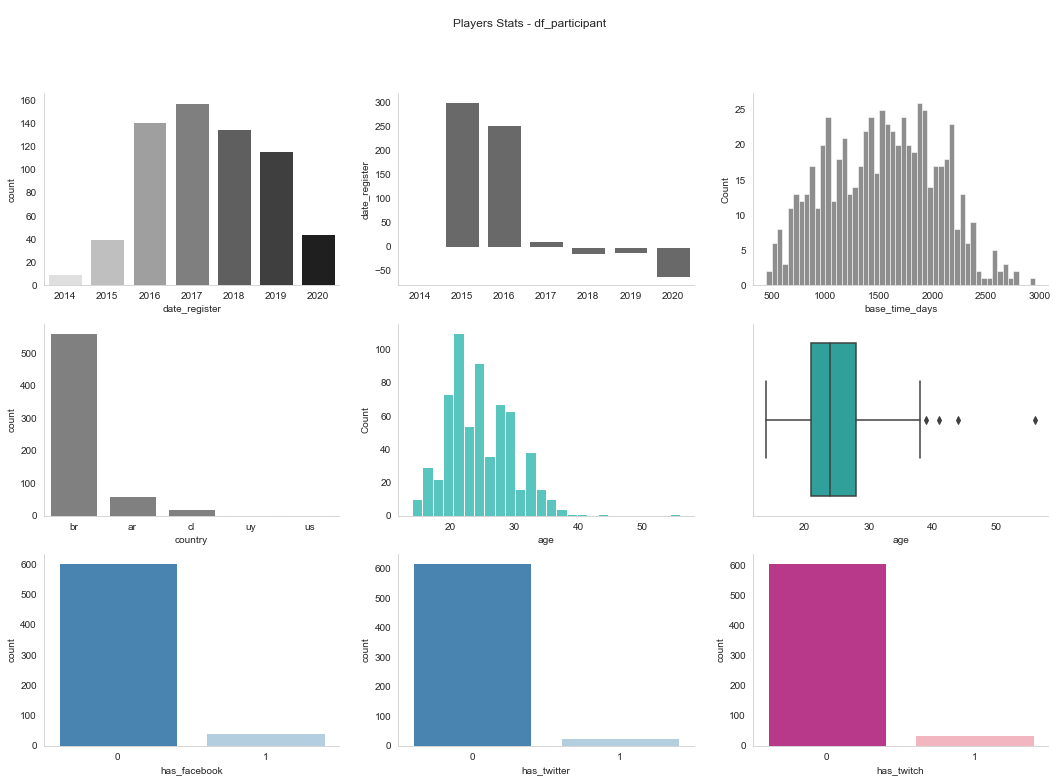

In [38]:
plot_stats(df_participant, 'df_participant')

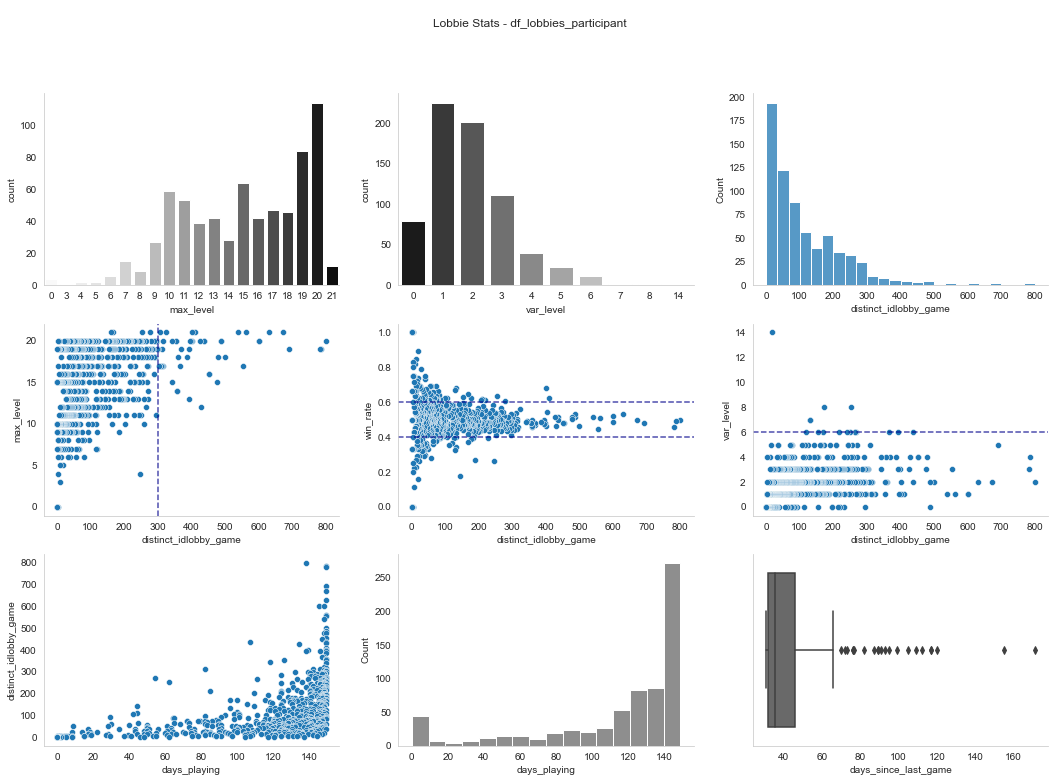

In [39]:
plot_player_lobbie_stats(df_lobbies_participant, 'df_lobbies_participant')

#### **Elite**

In [40]:
# filtering players with elite medals

df_elite = df_players[df_players.player_id.isin(df_medals_players[df_medals_players.n_elite_medal > 0].player_id.values)]
df_lobbies_elite = df_lobbies[df_lobbies.player_id.isin(df_medals_players[df_medals_players.n_elite_medal > 0].player_id.values)]
df_elite

,player_id,has_facebook,has_twitch,has_twitter,has_social,has_social_engaged,date_register,date_register_ym,base_time_days,base_time_months,date_birthday,age,country,flag_br
0,1,0,0,0,0,0,2014-01-27,2014-01,2932,97,1995-03-06,26.0,br,1
1,2,0,0,0,0,0,2014-01-02,2014-01,2957,98,1997-05-26,24.0,br,1
2,3,0,0,0,0,0,2014-07-07,2014-07,2771,92,1997-09-17,24.0,br,1
7,8,0,0,0,0,0,2014-07-20,2014-07,2758,91,1990-01-21,32.0,br,1
8,9,0,0,0,0,0,2014-09-19,2014-09,2697,89,1988-03-28,33.0,br,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1585,0,0,0,0,0,2020-08-24,2020-08,531,17,1998-04-04,23.0,ar,0
1591,1592,0,0,0,0,0,2020-03-15,2020-03,693,23,1998-07-03,23.0,br,1
1617,1618,0,0,0,0,0,2020-09-10,2020-09,514,17,1998-06-13,23.0,br,1
1622,1623,0,0,0,0,0,2020-08-06,2020-08,549,18,2002-05-11,19.0,ar,0


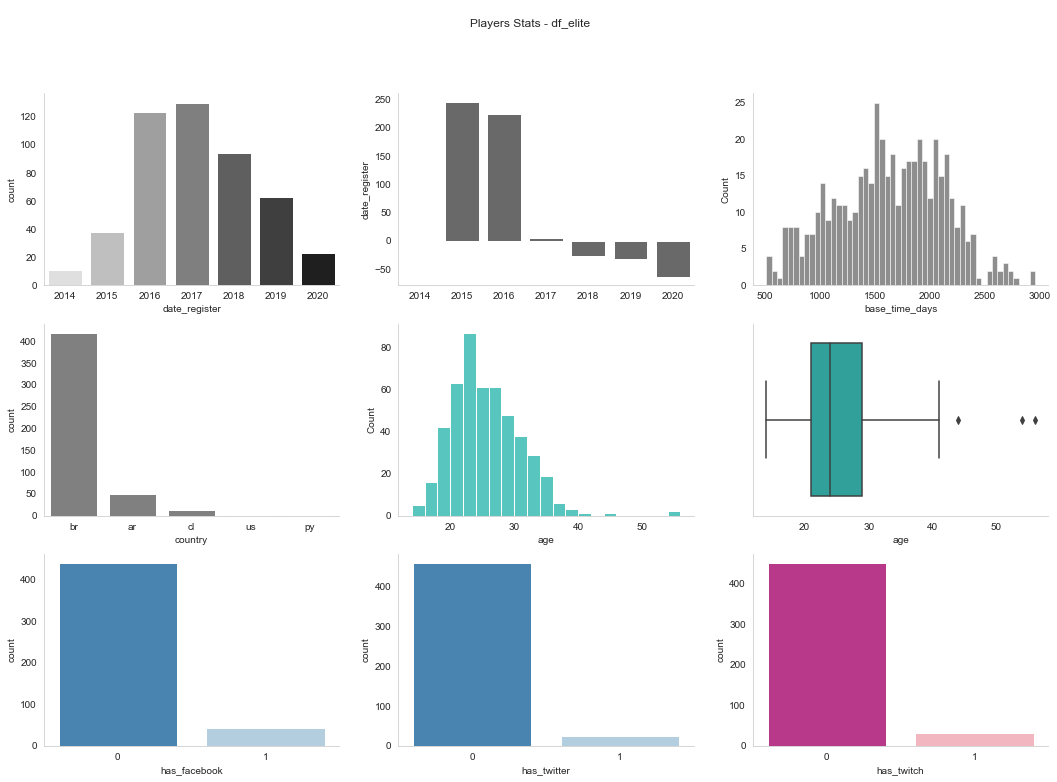

In [41]:
plot_stats(df_elite, 'df_elite')

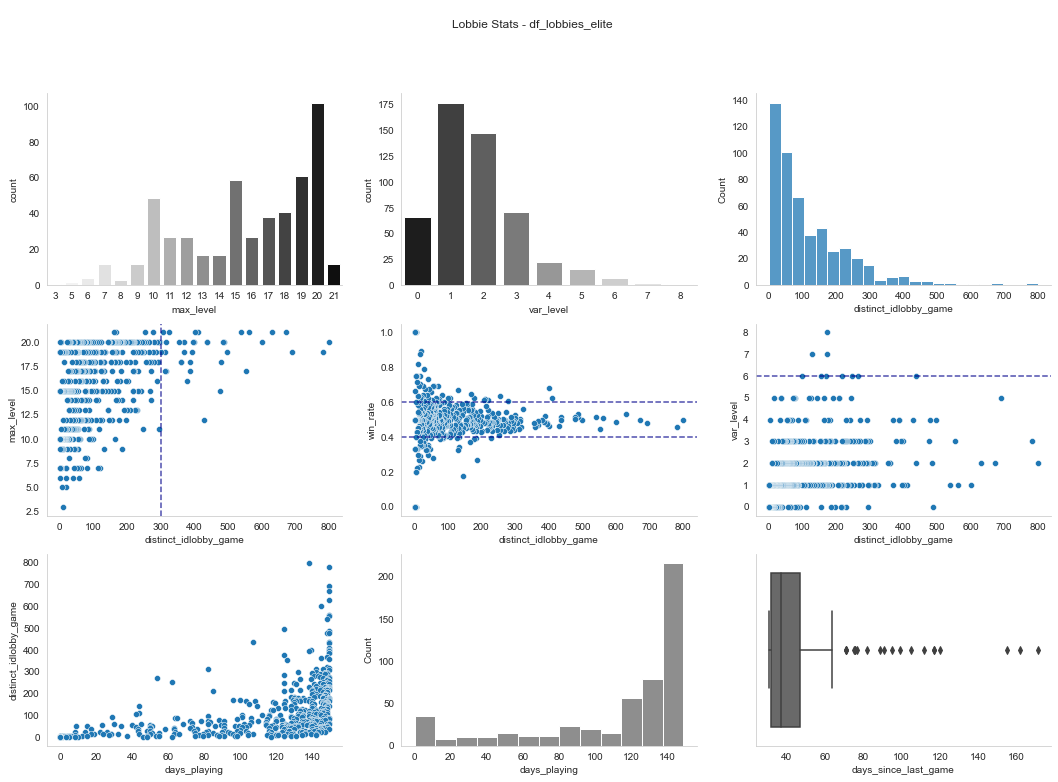

In [42]:
plot_player_lobbie_stats(df_lobbies_elite, 'df_lobbies_elite')

### **Workflow - Maps**

**This may be a start when analysing maps...**

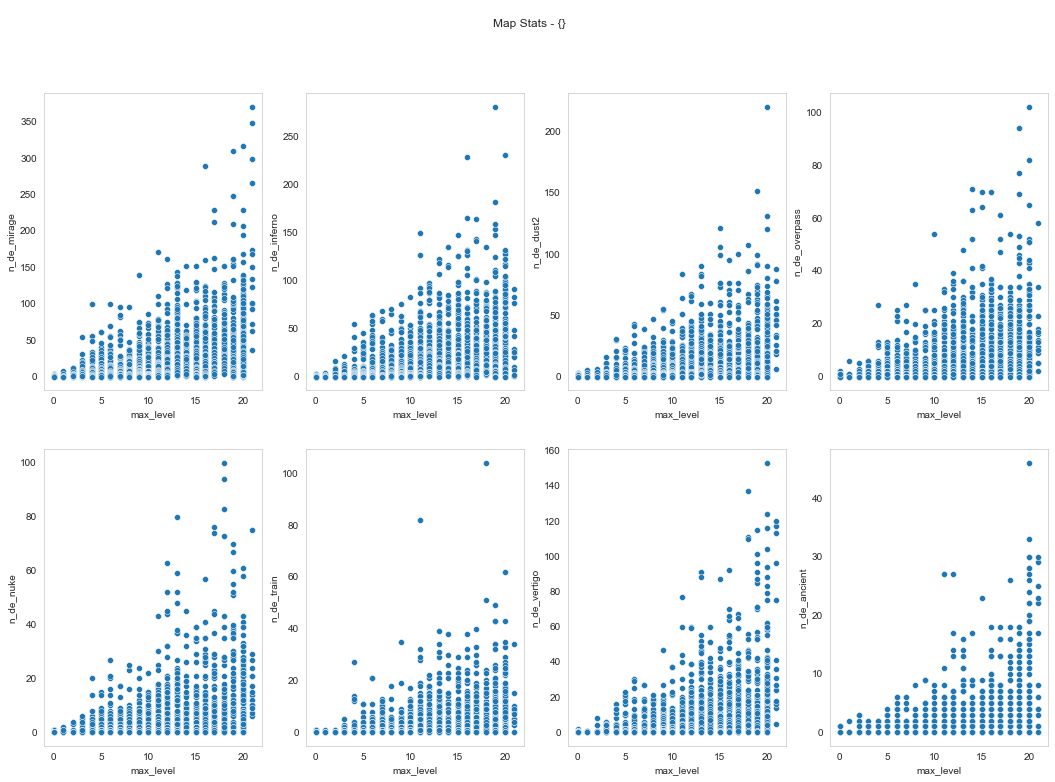

In [43]:
 # maps
fig, axs = plt.subplots(2, 4, figsize = (18,12))
fig.suptitle('\nMap Stats - {}')

sns.scatterplot(ax = axs[0][0], x=df_lobbies.max_level, y=df_lobbies.n_de_mirage)
sns.scatterplot(ax = axs[0][1], x=df_lobbies.max_level, y=df_lobbies.n_de_inferno)
sns.scatterplot(ax = axs[0][2], x=df_lobbies.max_level, y=df_lobbies.n_de_dust2)
sns.scatterplot(ax = axs[0][3], x=df_lobbies.max_level, y=df_lobbies.n_de_overpass)

sns.scatterplot(ax = axs[1][0], x=df_lobbies.max_level, y=df_lobbies.n_de_nuke)
sns.scatterplot(ax = axs[1][1], x=df_lobbies.max_level, y=df_lobbies.n_de_train)
sns.scatterplot(ax = axs[1][2], x=df_lobbies.max_level, y=df_lobbies.n_de_vertigo)
sns.scatterplot(ax = axs[1][3], x=df_lobbies.max_level, y=df_lobbies.n_de_ancient)

plt.savefig(os.path.join(PLOT_DIR, 'maps_max_level'), bbox_inches='tight')
plt.show()